In [1]:
batch_size = 32
img_height = 180
img_width = 180

In [2]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.python.keras.utils import np_utils
from keras import backend as K
K.image_dim_ordering='th'

In [35]:
import os
import tensorflow as tf
from tensorflow import keras

In [7]:
data_dir='D:\\My projects\\ComputerVision\\PlantSeedlingClassification\\NonsegmentedV2'


In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5265 files belonging to 11 classes.
Using 4212 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5265 files belonging to 11 classes.
Using 1053 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Small-flowered Cranesbill', 'Sugar beet']


Visualize the data

Here are the first nine images from the training dataset:

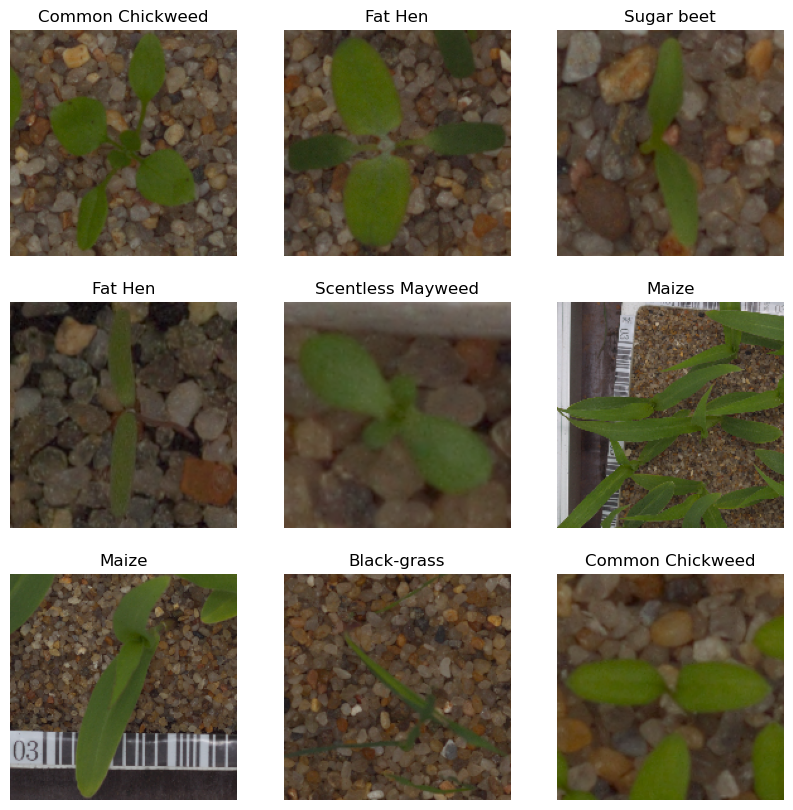

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Standardize the data

In [15]:
from tensorflow.keras import layers

In [16]:
normalization_layer = layers.Rescaling(1./255)

In [18]:
import numpy as np

In [19]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8573848


Create the model

In [22]:
num_classes = len(class_names)

def larger_model():
# create model
    model = Sequential()
    model.add(Convolution2D(30,5,5, padding='same', input_shape=(img_height, img_width, 3), activation= 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='same'))
    model.add(Convolution2D(15, 3, 3,padding='same', activation= 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' ))
    model.add(Dense(50, activation= 'relu' ))
    model.add(Dense(num_classes, activation= 'softmax' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

In [23]:
# build the model
model = larger_model()
# Fit the model
model.fit(train_ds, validation_data=val_ds, epochs=10, batch_size=200,
verbose=2)

Epoch 1/10


ValueError: in user code:

    File "C:\ProgramData\anaconda3\envs\CV-MNIST\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\anaconda3\envs\CV-MNIST\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\anaconda3\envs\CV-MNIST\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\anaconda3\envs\CV-MNIST\Lib\site-packages\keras\src\engine\training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\ProgramData\anaconda3\envs\CV-MNIST\Lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "C:\ProgramData\anaconda3\envs\CV-MNIST\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\ProgramData\anaconda3\envs\CV-MNIST\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\ProgramData\anaconda3\envs\CV-MNIST\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\ProgramData\anaconda3\envs\CV-MNIST\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\ProgramData\anaconda3\envs\CV-MNIST\Lib\site-packages\keras\src\backend.py", line 5575, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 11) are incompatible


In [24]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model summary

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 64)       

Train the model

In [27]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
132/132 [==============================] - 146s 1s/step - loss: 1.8288 - accuracy: 0.3528 - val_loss: 1.2577 - val_accuracy: 0.5518
Epoch 2/10
132/132 [==============================] - 119s 900ms/step - loss: 1.0791 - accuracy: 0.6379 - val_loss: 1.0310 - val_accuracy: 0.6325
Epoch 3/10
132/132 [==============================] - 106s 801ms/step - loss: 0.7926 - accuracy: 0.7293 - val_loss: 0.8237 - val_accuracy: 0.7227
Epoch 4/10
132/132 [==============================] - 106s 802ms/step - loss: 0.5627 - accuracy: 0.8096 - val_loss: 0.6803 - val_accuracy: 0.7683
Epoch 5/10
132/132 [==============================] - 107s 808ms/step - loss: 0.3686 - accuracy: 0.8794 - val_loss: 0.7663 - val_accuracy: 0.7578
Epoch 6/10
132/132 [==============================] - 106s 802ms/step - loss: 0.2766 - accuracy: 0.9103 - val_loss: 0.7386 - val_accuracy: 0.7673
Epoch 7/10
132/132 [==============================] - 106s 804ms/step - loss: 0.1817 - accuracy: 0.9414 - val_loss: 0.6985 - va

Visualize training results

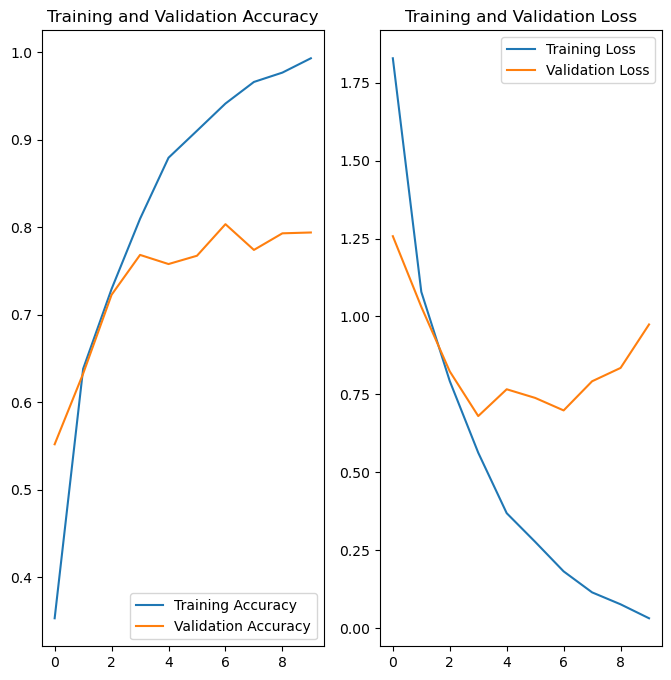

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 60% accuracy on the validation set.

Overfitting

In [36]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

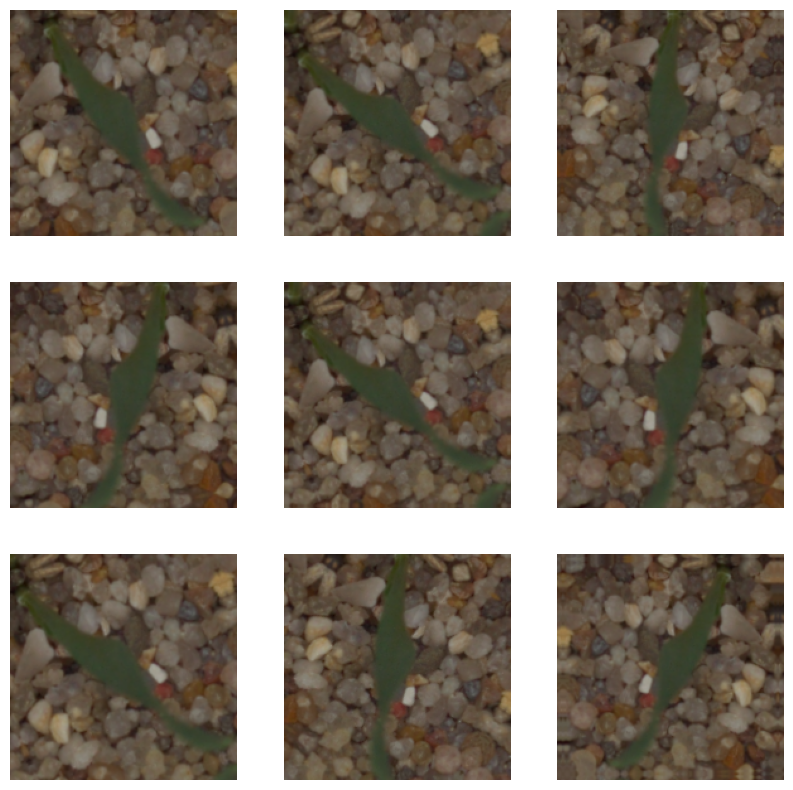

In [38]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

with data augmentation and Dropout

In [37]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])



Compile and train the model

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [41]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
132/132 [==============================] - 143s 1s/step - loss: 1.9322 - accuracy: 0.3158 - val_loss: 1.3397 - val_accuracy: 0.5546
Epoch 2/15
132/132 [==============================] - 132s 1s/step - loss: 1.2044 - accuracy: 0.5928 - val_loss: 1.0561 - val_accuracy: 0.6315
Epoch 3/15
132/132 [==============================] - 129s 976ms/step - loss: 0.9972 - accuracy: 0.6664 - val_loss: 0.8279 - val_accuracy: 0.7208
Epoch 4/15
132/132 [==============================] - 126s 958ms/step - loss: 0.8991 - accuracy: 0.7073 - val_loss: 0.8396 - val_accuracy: 0.7123
Epoch 5/15
132/132 [==============================] - 127s 965ms/step - loss: 0.8023 - accuracy: 0.7372 - val_loss: 0.7336 - val_accuracy: 0.7493
Epoch 6/15
132/132 [==============================] - 126s 953ms/step - loss: 0.7473 - accuracy: 0.7474 - val_loss: 0.6205 - val_accuracy: 0.8006
Epoch 7/15
132/132 [==============================] - 126s 955ms/step - loss: 0.6917 - accuracy: 0.7692 - val_loss: 0.5829 - val_a

Visualize training results

After applying data augmentation and tf.keras.layers.Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned:

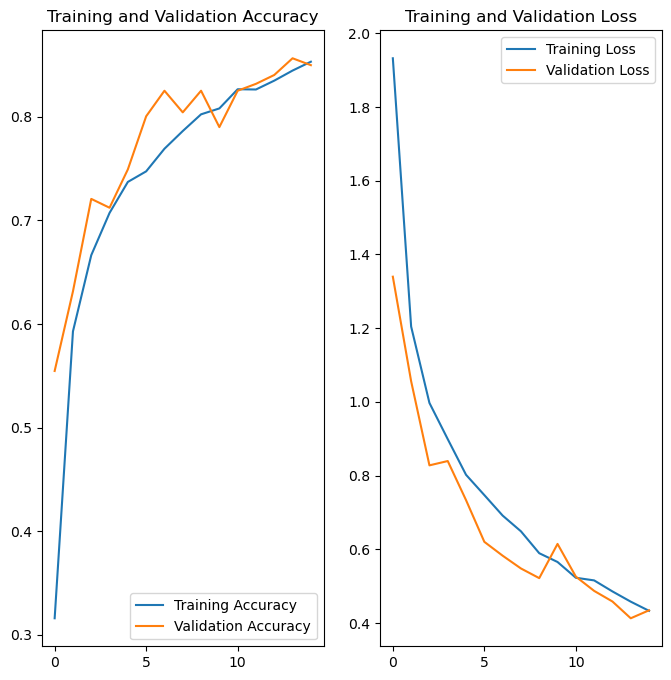

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predict on new data

In [52]:

maize_path = 'D:\\My projects\\ComputerVision\\PlantSeedlingClassification\\NonsegmentedV2\\Maize\\1.png'

img = tf.keras.utils.load_img(
    maize_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 3s 3s/step
This image most likely belongs to Maize with a 99.83 percent confidence.


In [ ]:

maize_path = 'D:\\My projects\\ComputerVision\\PlantSeedlingClassification\\NonsegmentedV2\\Maize\\1.png'

img = tf.keras.utils.load_img(
    maize_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [54]:
hen_path='D:\\My projects\\ComputerVision\\PlantSeedlingClassification\\NonsegmentedV2\\Fat Hen\\1.png'

img = tf.keras.utils.load_img(
    hen_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 44ms/step
This image most likely belongs to Fat Hen with a 93.32 percent confidence.


Convert the Keras Sequential model to a TensorFlow Lite model

In [55]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpdoeh_9aa\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpdoeh_9aa\assets


Run the TensorFlow Lite model

In [2]:
import os
import tensorflow as tf
from tensorflow import keras

In [3]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [4]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_3_input'], 'outputs': ['outputs']}}

In [5]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [12]:


Chickweed_path='C:\\Users\\heman\\Downloads\\Chickweed.jpg'

img = tf.keras.utils.load_img(
    Chickweed_path, target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch



In [14]:
predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [18]:
import numpy as np

In [ ]:

class_names1=['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Small-flowered Cranesbill', 'Sugar beet']

In [19]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names1[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to Common Chickweed with a 99.78 percent confidence.


In [22]:

Scentless_path='C:\\Users\\heman\\Downloads\\Scentless-seedling.jpg'

img = tf.keras.utils.load_img(
    Scentless_path, target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [23]:
predictions_lite = classify_lite(sequential_3_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [24]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names1[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to Scentless Mayweed with a 99.78 percent confidence.
